
# Simple Linear Regression Example 

We use the `diabetes` dataset from sklearn to demonstrate linear regression. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Load the diabetes dataset from sci-ket learn library. 

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
type(diabetes) # not a pandas dataframe

sklearn.utils.Bunch

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Set up the input numpy array X. Note we are not using Pandas data frame here. 

In [10]:
X = diabetes.data

Add a coloumn of ones for matrix calcuation. 

In [11]:
X_b = np.c_[np.ones((442, 1)), diabetes.data]

y is the output numpy array

In [ ]:
y = diabetes.target

In [12]:
type(X_b)

numpy.ndarray

In [13]:
X_b.shape

(442, 11)

In [14]:
type(y)

numpy.ndarray

In [15]:
y.shape

(442,)

Transform y into a 442 by 1 column vector. 

In [16]:
y = y.reshape(442,1)

In [17]:
y.shape

(442, 1)

Apply normal equation to solve the linear regression problem DIRECTLY. 

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
theta_best

array([[ 152.13348416],
       [ -10.01219782],
       [-239.81908937],
       [ 519.83978679],
       [ 324.39042769],
       [-792.18416163],
       [ 476.74583782],
       [ 101.04457032],
       [ 177.06417623],
       [ 751.27932109],
       [  67.62538639]])

## Use scikit-learn Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X_b, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The intercept and coefficient values of the trained model match exactly the numbers procuded by the normal equation. Indeed, the implementaiton of sci-kit learn's LinearRegression model is based on normal equation. 

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([152.13348416]),
 array([[   0.        ,  -10.01219782, -239.81908937,  519.83978679,
          324.39042769, -792.18416163,  476.74583782,  101.04457032,
          177.06417623,  751.27932109,   67.62538639]]))

## Implement a Simple Batch Gradient Descent

Another solution to solve linear regression is Batch Gradient Descent. The implementation below is taken from Chapter 4. 

In [44]:
eta = 0.5
n_iterations = 1500000
m = 442 
theta = np.random.randn(11,1) 

In [45]:
theta.shape

(11, 1)

In [46]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [26]:
theta

array([[ 152.13348416],
       [ -10.01219782],
       [-239.81908937],
       [ 519.83978679],
       [ 324.39042769],
       [-792.18416163],
       [ 476.74583782],
       [ 101.04457032],
       [ 177.06417623],
       [ 751.27932109],
       [  67.62538639]])

Tune the parameter eta and n_iterations to see if you can get a result close to the ones produced by normal equation. 

## Use Stochastic Gradient Descent

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)

In [56]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, random_state=42) 

In [57]:
sgd_reg.fit(X, y.ravel())  # y.ravel() flatten to 1D array 

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [58]:
sgd_reg.intercept_, sgd_reg.coef_

(array([152.07065864]),
 array([ -0.47004935, -11.4072559 ,  24.75715081,  15.38468229,
        -32.47369237,  18.55792417,   2.44749955,   7.7827137 ,
         33.79026938,   3.20883072]))

In [59]:
sgd_reg.n_iter_  # actual number of iteration 

1000

Fine-tune the model. Use GridSearchCV to find the best combination of parameters.  Here we look at only three parameters. 

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 36 (3×3×4) combinations of hyperparameters
    {'eta0': [0.2, 0.25, 0.5], 
     'learning_rate': ['constant','optimal','invscaling'],
     'penalty': ['l2', 'l1', 'elasticnet', 'none'],    
    },
  ]

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'eta0': [0.2, 0.25, 0.5], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'penalty': ['l2', 'l1', 'elasticnet', 'none']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Check the best parameters produced by the search

In [61]:
grid_search.best_params_

{'eta0': 0.2, 'learning_rate': 'invscaling', 'penalty': 'l1'}

Access the model with the best parameter. 

In [62]:
grid_search.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.2,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

## Plot the learning curve

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validate")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)             

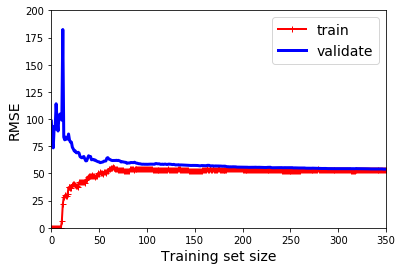

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y.ravel())
plt.axis([0, 350, 0, 200])                       
plt.show()                                      

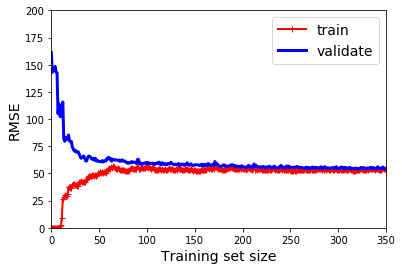

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,  eta0=0.2, penalty='l1', random_state=42, learning_rate='invscaling', ) 
plot_learning_curves(sgd_reg, X, y.ravel())
plt.axis([0, 350, 0, 200])                      
plt.show() 

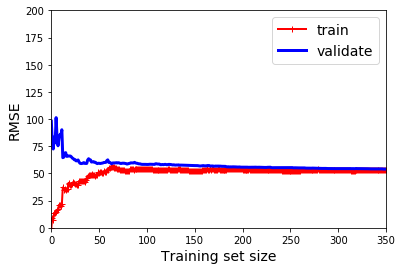

In [38]:

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
plot_learning_curves(ridge_reg, X, y.ravel())
plt.axis([0, 350, 0, 200])                      
plt.show() 

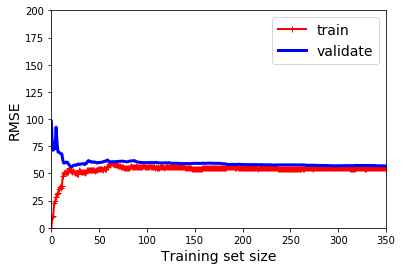

In [39]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(random_state=42)
plot_learning_curves(elastic_reg, X, y.ravel())
plt.axis([0, 350, 0, 200])                      
plt.show() 

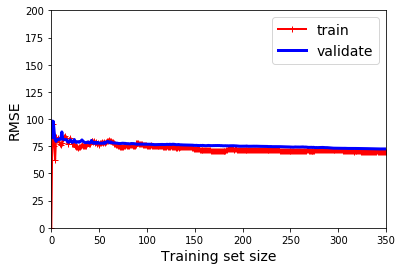

In [40]:
from sklearn.svm import SVR
svr_rbf = SVR()
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
plot_learning_curves(svr_rbf, X, y.ravel())
plt.axis([0, 350, 0, 200])                      
plt.show() 

In the figure above, RMSE error of both training and validate are high, indicating this model is underfitting. 

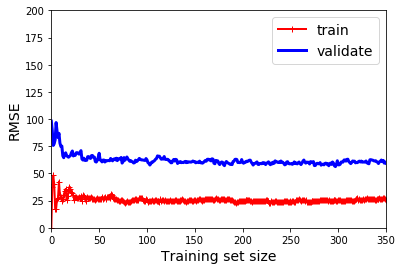

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
plot_learning_curves(forest_reg, X, y.ravel())
plt.axis([0, 350, 0, 200])                      
plt.show() 

In the figure above, the gap between the training and validate RMSE indicates the model is overfitting. 

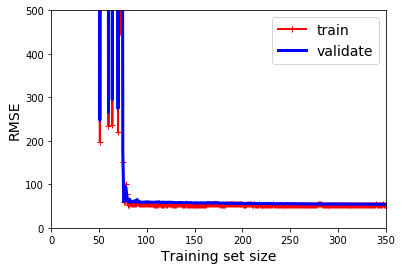

In [42]:
sgd_reg = SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.2,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=1000, n_iter=None,
       penalty='elasticnet', power_t=0.25, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

plot_learning_curves(sgd_reg, X, y.ravel())
plt.axis([0, 350, 0, 500])                      
plt.show()

The figure above shows how stochastic gradient descent stablizes after initial fluctuation. 